#### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors

#### Import the data

In [2]:
cc_origin = pd.read_csv('datasets_49737_90340_CC GENERAL.csv')
cc_origin.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 1. Data Preparation

#### 1.1 Basic Data Exploration

Basic data exploration on the original dataset is done, e.g. data size, metadata, statistics of the dataset

In [3]:
cc_origin.shape

(8950, 18)

In [4]:
cc_origin.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
cc_origin.describe(include = 'all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C13446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


#### 1.2. Null Value Handling

Null values on `CREDIT_LIMIT` & `MINIMUM_PAYMENTS` are found. We copy the original dataset and handle it case by case

In [6]:
cc_dataprep = cc_origin.copy()

##### i. `CREDIT_LIMIT`
- 1 record is found. Since it is impossible to have 0/null credit limit, it is reasonable to say it is a record with error and we decide to remove the record

In [7]:
cc_dataprep.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

##### ii. `MINIMUM_PAYMENTS` 
- 313 records (3.4% of total records). Investigation is done and we found that there is no record with `MINIMUM_PAYMENTS` = 0, while most records are with `PAYMENTS` = 0. It is reasonable to assume that these records have 0 minimum payments and we decide to fill in na with 0

In [8]:
print(cc_dataprep[cc_dataprep.MINIMUM_PAYMENTS == 0].shape)
print(cc_dataprep[(cc_dataprep.PAYMENTS == 0) & (cc_dataprep.MINIMUM_PAYMENTS.isnull() == True)].shape)
print(cc_dataprep[(cc_dataprep.PAYMENTS != 0) & (cc_dataprep.MINIMUM_PAYMENTS.isnull() == True)].shape)

(0, 18)
(240, 18)
(73, 18)


In [9]:
cc_dataprep.fillna(value = {'MINIMUM_PAYMENTS':0}, inplace = True)

Let's check again the metadata of the modified dataset

In [10]:
cc_dataprep.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8949 non-null object
BALANCE                             8949 non-null float64
BALANCE_FREQUENCY                   8949 non-null float64
PURCHASES                           8949 non-null float64
ONEOFF_PURCHASES                    8949 non-null float64
INSTALLMENTS_PURCHASES              8949 non-null float64
CASH_ADVANCE                        8949 non-null float64
PURCHASES_FREQUENCY                 8949 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8949 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8949 non-null float64
CASH_ADVANCE_FREQUENCY              8949 non-null float64
CASH_ADVANCE_TRX                    8949 non-null int64
PURCHASES_TRX                       8949 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8949 non-null float64
MINIMUM_PAYMENTS            

### 2. Data Exploration

#### 2.1. Feature enrichment

Before exploring different variables, more features are enriched by deriving from the dataset based on i) domain knowledge of business and model; ii) business requirement

In [11]:
cc_dataexpl = cc_dataprep.copy()

##### i. Domain Knowledge
- RFM (Recency, Frequency, Monetary Value) segmentation allows marketers to target specific clusters of customers with communications that are much more relevant for their particular behavior. Here we derive to enrich the features for RFM segementation

*Recency*
- Since the dataset has no information on the recency of card spending. It is not included in this case

*Frequency*
- We define it as the monthly average number of transactions (purchases + cash advance). Similar derivation is applied to purchases only and cash advance only too.

In [12]:
cc_dataexpl['TOTAL_SPENT_TRX'] = cc_dataexpl.PURCHASES_TRX + cc_dataexpl.CASH_ADVANCE_TRX
cc_dataexpl['AVG_TOTAL_SPENT_TRX'] = cc_dataexpl.TOTAL_SPENT_TRX / cc_dataexpl.TENURE
cc_dataexpl['AVG_PURCHASES_TRX'] = cc_dataexpl.PURCHASES_TRX / cc_dataexpl.TENURE
cc_dataexpl['AVG_CASH_ADVANCE_TRX'] = cc_dataexpl.CASH_ADVANCE_TRX / cc_dataexpl.TENURE

In [13]:
# Checking
print(cc_dataexpl[cc_dataexpl['TOTAL_SPENT_TRX'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_TOTAL_SPENT_TRX'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_PURCHASES_TRX'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_CASH_ADVANCE_TRX'].isnull()].shape)

(0, 22)
(0, 22)
(0, 22)
(0, 22)


*Monetary Value*
- We define it as the average amount per transaction (purchases + cash advance). Similar derivation is applied to purchases only and cash advance only too.

In [14]:
cc_dataexpl['TOTAL_SPENT'] = cc_dataexpl.PURCHASES + cc_dataexpl.CASH_ADVANCE
cc_dataexpl['AVG_TOTAL_SPENT'] = cc_dataexpl.TOTAL_SPENT / cc_dataexpl.TOTAL_SPENT_TRX
cc_dataexpl['AVG_PURCHASES'] = cc_dataexpl.PURCHASES / cc_dataexpl.PURCHASES_TRX
cc_dataexpl['AVG_CASH_ADVANCE'] = cc_dataexpl.CASH_ADVANCE / cc_dataexpl.CASH_ADVANCE_TRX

In [15]:
# Checking
print(cc_dataexpl[cc_dataexpl['TOTAL_SPENT'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_TOTAL_SPENT'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_TOTAL_SPENT'] == np.inf].shape)
print(cc_dataexpl[cc_dataexpl['AVG_PURCHASES'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_PURCHASES'] == np.inf].shape)
print(cc_dataexpl[cc_dataexpl['AVG_CASH_ADVANCE'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_CASH_ADVANCE'] == np.inf].shape)

(0, 26)
(1, 26)
(3, 26)
(2040, 26)
(3, 26)
(4628, 26)
(0, 26)


In general, the nan & inf values are caused by i) both nominator & denominator (e.g. `PURCHASES` & `PURCHASES_TRX`) are 0, or ii) only denominator is 0 respectively. We decide to fill na with 0 for case i), and drop the records with inf for case ii) as case ii) are likely with error 

In [16]:
cc_dataexpl.fillna(value = {'AVG_TOTAL_SPENT':0, 'AVG_PURCHASES':0, 'AVG_CASH_ADVANCE':0}, inplace = True)
cc_dataexpl = cc_dataexpl.replace({v: [np.inf, -np.inf] for v in ['AVG_TOTAL_SPENT', 'AVG_PURCHASES']}, np.nan)
cc_dataexpl.dropna(subset = ['AVG_TOTAL_SPENT', 'AVG_PURCHASES'], inplace = True)

In [17]:
cc_dataexpl.shape

(8946, 26)

##### ii. Business Requirement
- From the requirement note (datasets_49737_90340_CREDIT CARD - SEGMENTATION CASE STUDY.pdf), we can see there are specified intelligent APIs that can be used as the clustering features

*Monthly average purchase and cash advance amount*

In [18]:
cc_dataexpl['MTH_AVG_TOTAL_SPENT'] = cc_dataexpl.TOTAL_SPENT / cc_dataexpl.TENURE
cc_dataexpl['MTH_AVG_PURCHASES'] = cc_dataexpl.PURCHASES / cc_dataexpl.TENURE
cc_dataexpl['MTH_AVG_CASH_ADVANCE'] = cc_dataexpl.CASH_ADVANCE / cc_dataexpl.TENURE

In [19]:
# Checking
print(cc_dataexpl[cc_dataexpl['MTH_AVG_TOTAL_SPENT'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['MTH_AVG_PURCHASES'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['MTH_AVG_CASH_ADVANCE'].isnull()].shape)

(0, 29)
(0, 29)
(0, 29)


*Purchase by type*
- We decide to apply one_off purchases over total purchases ratio since purchases should be equal to sum of one-off purchases and installments purchases. Same as above, we will check on this logic, and check if there is nan or inf value on the new feature.

Some records that violates the rule "`PURCHASES` = `ONEOFF_PURCHASES` + `INSTALLMENTS_PURCHASES`". We will drop them and continue to derive the new features

In [20]:
cc_dataexpl[(cc_dataexpl.PURCHASES - cc_dataexpl.ONEOFF_PURCHASES - cc_dataexpl.INSTALLMENTS_PURCHASES).abs() > 1e-6].shape

(18, 29)

In [21]:
cc_dataexpl = cc_dataexpl[(cc_dataexpl.PURCHASES - cc_dataexpl.ONEOFF_PURCHASES - cc_dataexpl.INSTALLMENTS_PURCHASES).abs() < 1e-6]

In [22]:
cc_dataexpl['ONEOFF_PUR_TO_PURCHASES_RATIO'] = cc_dataexpl.ONEOFF_PURCHASES / cc_dataexpl.PURCHASES
cc_dataexpl.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,AVG_PURCHASES_TRX,AVG_CASH_ADVANCE_TRX,TOTAL_SPENT,AVG_TOTAL_SPENT,AVG_PURCHASES,AVG_CASH_ADVANCE,MTH_AVG_TOTAL_SPENT,MTH_AVG_PURCHASES,MTH_AVG_CASH_ADVANCE,ONEOFF_PUR_TO_PURCHASES_RATIO
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0.166667,0.000000,95.400000,47.700000,47.700000,0.000000,7.950000,7.950000,0.000000,0.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.000000,0.333333,6442.945483,1610.736371,0.000000,1610.736371,536.912124,0.000000,536.912124,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,773.170000,64.430833,64.430833,0.000000,64.430833,64.430833,0.000000,1.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.083333,0.083333,1704.788017,852.394009,1499.000000,205.788017,142.065668,124.916667,17.149001,1.0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0.083333,0.000000,16.000000,16.000000,16.000000,0.000000,1.333333,1.333333,0.000000,1.0


In [23]:
# Checking
print(cc_dataexpl[cc_dataexpl['ONEOFF_PUR_TO_PURCHASES_RATIO'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['ONEOFF_PUR_TO_PURCHASES_RATIO'] == np.inf].shape)

(2041, 30)
(0, 30)


In [24]:
cc_dataexpl.fillna(value = {'ONEOFF_PUR_TO_PURCHASES_RATIO':0}, inplace = True)

*Limit usage*

In [25]:
cc_dataexpl['BALANCE_TO_CREDIT_RATIO'] = cc_dataexpl.BALANCE / cc_dataexpl.CREDIT_LIMIT

In [26]:
# Checking
print(cc_dataexpl[cc_dataexpl['BALANCE_TO_CREDIT_RATIO'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['BALANCE_TO_CREDIT_RATIO'] == np.inf].shape)

(0, 31)
(0, 31)


*Minimum payments to payments ratio*

In [27]:
cc_dataexpl['MIN_PAY_TO_PAYMENTS_RATIO'] = cc_dataexpl.MINIMUM_PAYMENTS / cc_dataexpl.PAYMENTS

In [28]:
# Checking
print(cc_dataexpl[cc_dataexpl['MIN_PAY_TO_PAYMENTS_RATIO'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['MIN_PAY_TO_PAYMENTS_RATIO'] == np.inf].shape)

(240, 32)
(0, 32)


In [29]:
cc_dataexpl.fillna(value = {'MIN_PAY_TO_PAYMENTS_RATIO':0}, inplace = True)

Let's look at the metadata of the enriched dataset. Indeed nan & inf values were found after the enrichment. They are handled above iteratively until the dataset is good to be used.

In [30]:
cc_dataexpl.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8928 entries, 0 to 8949
Data columns (total 32 columns):
CUST_ID                             8928 non-null object
BALANCE                             8928 non-null float64
BALANCE_FREQUENCY                   8928 non-null float64
PURCHASES                           8928 non-null float64
ONEOFF_PURCHASES                    8928 non-null float64
INSTALLMENTS_PURCHASES              8928 non-null float64
CASH_ADVANCE                        8928 non-null float64
PURCHASES_FREQUENCY                 8928 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8928 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8928 non-null float64
CASH_ADVANCE_FREQUENCY              8928 non-null float64
CASH_ADVANCE_TRX                    8928 non-null int64
PURCHASES_TRX                       8928 non-null int64
CREDIT_LIMIT                        8928 non-null float64
PAYMENTS                            8928 non-null float64
MINIMUM_PAYMENTS            

#### 2.2. Variables exploration

Let's look at the statistics of the enriched dataset which can describe the card usage behaviours

In [31]:
cc_dataexpl.describe(include = 'all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TOTAL_SPENT,AVG_TOTAL_SPENT,AVG_PURCHASES,AVG_CASH_ADVANCE,MTH_AVG_TOTAL_SPENT,MTH_AVG_PURCHASES,MTH_AVG_CASH_ADVANCE,ONEOFF_PUR_TO_PURCHASES_RATIO,BALANCE_TO_CREDIT_RATIO,MIN_PAY_TO_PAYMENTS_RATIO
count,8928,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,...,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000
unique,8928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C13446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1565.362871,0.877428,1003.964186,593.372506,410.591680,980.422367,0.490285,0.202817,0.364207,...,1984.386553,206.250972,73.906303,209.238077,175.362469,86.238710,89.123759,0.379887,0.388993,1.636539
std,NaN,2081.250400,0.236727,2138.275012,1661.452739,903.229756,2098.952396,0.401435,0.298555,0.397411,...,2918.131720,446.680376,160.574651,536.187303,258.467100,180.649717,193.309358,0.425557,0.389717,18.513696
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,128.545654,0.888889,39.405000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,...,364.930573,43.745767,11.997500,0.000000,31.560172,3.342625,0.000000,0.000000,0.041552,0.142469
50%,NaN,873.942013,1.000000,361.280000,39.000000,88.915000,0.000000,0.500000,0.083333,0.166667,...,1068.065000,85.545902,41.475000,0.000000,92.862083,31.936667,0.000000,0.112479,0.303106,0.426694
75%,NaN,2057.408524,1.000000,1111.567500,579.017500,466.865000,1115.893926,0.916667,0.300000,0.750000,...,2514.447500,198.148883,78.780056,247.488382,219.875119,97.401042,99.150555,0.874207,0.717241,1.025210


##### i. Monthly average transaction amount

In [32]:
cc_dataexpl[['MTH_AVG_TOTAL_SPENT', 'MTH_AVG_PURCHASES', 'MTH_AVG_CASH_ADVANCE']].describe()

,MTH_AVG_TOTAL_SPENT,MTH_AVG_PURCHASES,MTH_AVG_CASH_ADVANCE
count,8928.000000,8928.000000,8928.000000
mean,175.362469,86.238710,89.123759
std,258.467100,180.649717,193.309358
min,0.000000,0.000000,0.000000
25%,31.560172,3.342625,0.000000
50%,92.862083,31.936667,0.000000
75%,219.875119,97.401042,99.150555
max,4133.144740,4086.630833,3928.100980


Text(0,0.5,'Frequency')

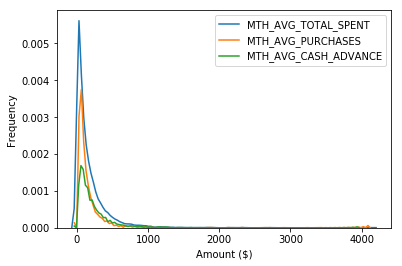

In [33]:
xlabels = ['MTH_AVG_TOTAL_SPENT', 'MTH_AVG_PURCHASES', 'MTH_AVG_CASH_ADVANCE']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)

plt.legend()
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

##### ii. Monthly average transaction count

In [34]:
cc_dataexpl[['AVG_TOTAL_SPENT_TRX', 'AVG_PURCHASES_TRX', 'AVG_CASH_ADVANCE_TRX']].describe()

,AVG_TOTAL_SPENT_TRX,AVG_PURCHASES_TRX,AVG_CASH_ADVANCE_TRX
count,8928.000000,8928.000000,8928.000000
mean,1.551905,1.259212,0.292694
std,2.140137,2.091604,0.619476
min,0.000000,0.000000,0.000000
25%,0.372159,0.083333,0.000000
50%,0.916667,0.666667,0.000000
75%,1.833333,1.500000,0.333333
max,29.833333,29.833333,10.250000


Text(0,0.5,'Frequency')

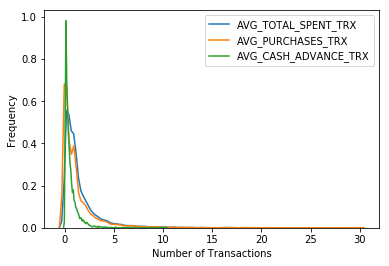

In [35]:
xlabels = ['AVG_TOTAL_SPENT_TRX', 'AVG_PURCHASES_TRX', 'AVG_CASH_ADVANCE_TRX']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)

plt.legend()
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')

##### iii. Average amount per transation

In [36]:
cc_dataexpl[['AVG_TOTAL_SPENT', 'AVG_PURCHASES', 'AVG_CASH_ADVANCE']].describe()

,AVG_TOTAL_SPENT,AVG_PURCHASES,AVG_CASH_ADVANCE
count,8928.000000,8928.000000,8928.000000
mean,206.250972,73.906303,209.238077
std,446.680376,160.574651,536.187303
min,0.000000,0.000000,0.000000
25%,43.745767,11.997500,0.000000
50%,85.545902,41.475000,0.000000
75%,198.148883,78.780056,247.488382
max,10590.411130,5981.666667,14836.451410


Text(0,0.5,'Frequency')

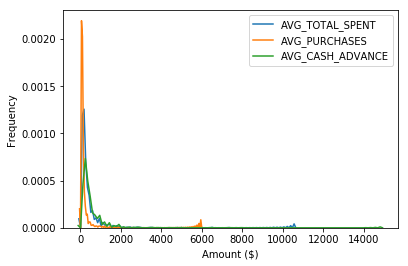

In [37]:
xlabels = ['AVG_TOTAL_SPENT', 'AVG_PURCHASES', 'AVG_CASH_ADVANCE']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)
    
plt.legend()
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

##### iv. Oneoff purchase to Total purchase ratio

In [38]:
cc_dataexpl[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','ONEOFF_PUR_TO_PURCHASES_RATIO']].describe()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,ONEOFF_PUR_TO_PURCHASES_RATIO
count,8928.000000,8928.000000,8928.000000,8928.000000
mean,1003.964186,593.372506,410.591680,0.379887
std,2138.275012,1661.452739,903.229756,0.425557
min,0.000000,0.000000,0.000000,0.000000
25%,39.405000,0.000000,0.000000,0.000000
50%,361.280000,39.000000,88.915000,0.112479
75%,1111.567500,579.017500,466.865000,0.874207
max,49039.570000,40761.250000,22500.000000,1.000000


Text(0,0.5,'Frequency')

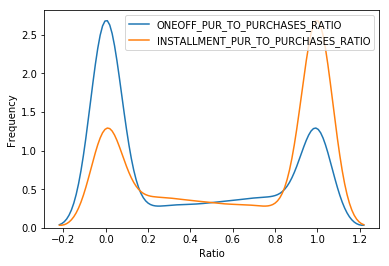

In [39]:
xlabels = ['ONEOFF_PUR_TO_PURCHASES_RATIO']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)
    sns.distplot(1 - cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = 'INSTALLMENT_PUR_TO_PURCHASES_RATIO')
    
plt.legend()
plt.xlabel('Ratio')
plt.ylabel('Frequency')

##### v. Balance To Credit Limit Ratio
- 1 weird case is found with balance_to_credit_limit ratio > 15, which we expect the (monthly average) balance should be similar or lower than credit limit. Investigation is needed if it is a record with error, but we will include it for now

In [40]:
cc_dataexpl[['BALANCE', 'CREDIT_LIMIT', 'BALANCE_TO_CREDIT_RATIO']].describe()

,BALANCE,CREDIT_LIMIT,BALANCE_TO_CREDIT_RATIO
count,8928.000000,8928.000000,8928.000000
mean,1565.362871,4495.108438,0.388993
std,2081.250400,3638.710789,0.389717
min,0.000000,50.000000,0.000000
25%,128.545654,1600.000000,0.041552
50%,873.942013,3000.000000,0.303106
75%,2057.408524,6500.000000,0.717241
max,19043.138560,30000.000000,15.909951


Text(0,0.5,'Frequency')

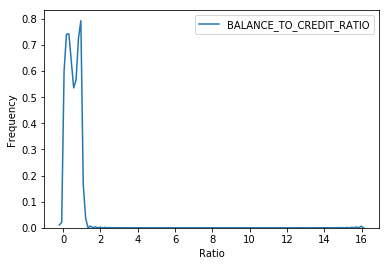

In [41]:
xlabels = ['BALANCE_TO_CREDIT_RATIO']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)
    
plt.legend()
plt.xlabel('Ratio')
plt.ylabel('Frequency')

In [42]:
cc_dataexpl.sort_values(by = 'BALANCE_TO_CREDIT_RATIO', ascending = False)[['CUST_ID', 'BALANCE', 'CREDIT_LIMIT', 'BALANCE_TO_CREDIT_RATIO']].head(20)

,CUST_ID,BALANCE,CREDIT_LIMIT,BALANCE_TO_CREDIT_RATIO
6951,C17140,795.497557,50.0,15.909951
3469,C13566,348.813275,150.0,2.325422
567,C10591,3457.086184,1700.0,2.033580
8008,C18225,1718.885963,1000.0,1.718886
3145,C13235,1884.252524,1200.0,1.570210
2404,C12477,1553.505165,1000.0,1.553505
6438,C16614,1540.478248,1000.0,1.540478
7879,C18093,1381.080028,1000.0,1.381080
2774,C12853,2748.868773,2000.0,1.374434
7707,C17913,1322.647480,1000.0,1.322647


##### vi. Minimum Payments To Payments Ratio
- Several cases are found with large min_pay_to_payments ratio. They commonly have low payments & credit limit but high minimum payments due. Investigation is needed if they are records with error, but we will include them for now

In [43]:
cc_dataexpl[['PAYMENTS', 'MINIMUM_PAYMENTS', 'MIN_PAY_TO_PAYMENTS_RATIO']].describe()

,PAYMENTS,MINIMUM_PAYMENTS,MIN_PAY_TO_PAYMENTS_RATIO
count,8928.000000,8928.000000,8928.000000
mean,1731.510847,834.390160,1.636539
std,2883.218678,2338.140249,18.513696
min,0.000000,0.000000,0.000000
25%,383.381582,163.111220,0.142469
50%,857.767711,289.717150,0.426694
75%,1903.672000,788.697284,1.025210
max,50721.483360,76406.207520,1369.069618


Text(0,0.5,'Frequency')

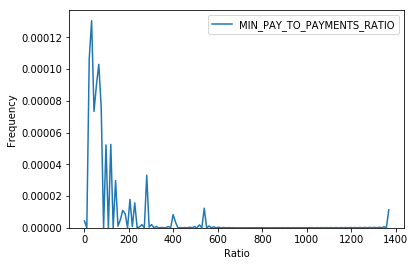

In [44]:
xlabels = ['MIN_PAY_TO_PAYMENTS_RATIO']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)
    
plt.legend()
plt.xlabel('Ratio')
plt.ylabel('Frequency')

In [45]:
cc_dataexpl.sort_values(by = 'MIN_PAY_TO_PAYMENTS_RATIO', ascending = False)[['CUST_ID','PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'MIN_PAY_TO_PAYMENTS_RATIO']].head(20)

,CUST_ID,PAYMENTS,MINIMUM_PAYMENTS,CREDIT_LIMIT,MIN_PAY_TO_PAYMENTS_RATIO
8732,C18969,0.049513,67.786744,500.0,1369.069618
4462,C14586,92.865469,50260.759470,5500.0,541.221188
5665,C15823,46.969049,18924.001990,3500.0,402.903665
2423,C12497,91.692752,26143.170490,3000.0,285.117089
78,C10082,29.278671,8242.687678,1200.0,281.525336
4942,C15081,27.832777,7751.321328,1200.0,278.496153
7837,C18050,58.892213,13333.794010,2500.0,226.410137
1683,C11738,128.371777,27146.026780,4000.0,211.464135
7132,C17325,302.484224,61031.618600,9000.0,201.767939
7349,C17548,77.991128,13916.702900,2500.0,178.439564


### 3. Feature Engineering

#### 3.1. Standardization

As all the features are continuous variables, we need not perform string indexing or one-hot encoding. However, the variables have quite different range of values. Before further engineering, we will standardize the variables to prevent bigger influence by variables with larger range of values

In [46]:
cc_dataengg = cc_dataexpl.copy()

In [47]:
cc_dataengg = cc_dataengg.loc[:, cc_dataengg.columns != 'CUST_ID']
scaler = StandardScaler()
scaler.fit(cc_dataengg)
cc_dataengg_norm = scaler.transform(cc_dataengg)
cc_dataengg_norm

array([[-0.73251518, -0.25028682, -0.424929  , ..., -0.89273192,
        -0.89324167, -0.05105797],
       [ 0.78664068,  0.1337601 , -0.46954691, ..., -0.89273192,
         0.17578472, -0.07428352],
       [ 0.44676895,  0.51780702, -0.1079408 , ...,  1.45726384,
        -0.14448811, -0.03393086],
       ...,
       [-0.74092505, -0.18628111, -0.40201205, ..., -0.89273192,
        -0.93815388, -0.03362121],
       [-0.74570183, -0.18628111, -0.46954691, ..., -0.89273192,
        -0.92913028, -0.0310888 ],
       [-0.57307933, -0.89036501,  0.04175834, ...,  1.45726384,
        -0.20118998, -0.01289909]])

#### 3.2. Principal Component Analysis

Before applying algorithm for clustering, we can study the correlations between features and reduce the large numbers of features into fewer number of distinct features using Principal Component Analysis

In [48]:
pca = PCA()
pca_samples = pca.fit_transform(cc_dataengg_norm)
pca_samples

array([[-2.50293246e+00, -8.76559818e-01,  2.35640284e-01, ...,
        -8.57835030e-18,  8.16070951e-15,  1.99424746e-15],
       [ 7.17795819e-02,  4.93738515e+00,  2.34843745e+00, ...,
        -3.09301078e-15, -2.35240765e-15,  1.49033253e-15],
       [ 7.31745917e-02, -1.32004609e+00,  3.92986758e-01, ...,
        -4.55013314e-15,  1.24299714e-14, -6.08801307e-15],
       ...,
       [-1.80049223e+00, -1.48217537e+00, -3.45357894e-01, ...,
        -1.36024202e-16, -4.72178560e-17, -5.97441244e-18],
       [-2.71888763e+00, -6.85857735e-02,  8.92373515e-02, ...,
         9.06091205e-18,  6.81653986e-17,  1.96446974e-16],
       [ 6.82968458e-01, -6.84515457e-01, -3.76095083e-02, ...,
        -7.56939735e-17, -9.62617778e-19,  1.91333269e-16]])

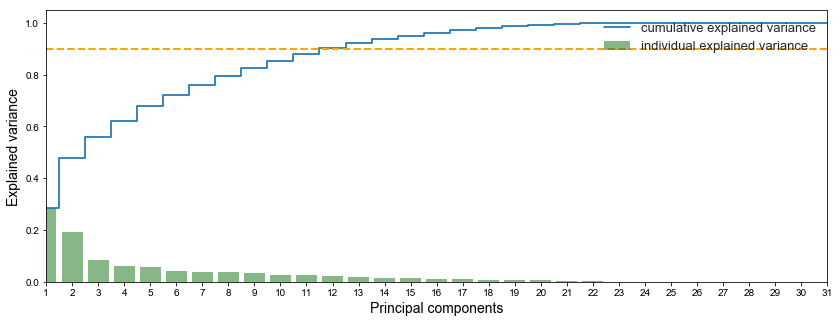

In [49]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.set(font_scale = 1)
plt.step(range(cc_dataengg_norm.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid', label = 'cumulative explained variance')
sns.barplot(np.arange(1, cc_dataengg_norm.shape[1] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g', label = 'individual explained variance')
plt.xlim(0, 30)

ax.axhline(0.9, linestyle ='--', linewidth = 2, color = 'orange')

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc = 'upper right', fontsize = 13);

We can see that the number of components to explain ~90% of the variance is 12. We can therefore keep these 12 components and apply them in the clustering algorithms.


In [50]:
pca = PCA(n_components = 12)
cc_dataengg_af_pca = pca.fit_transform(cc_dataengg_norm)
cc_dataengg_af_pca = pd.DataFrame(cc_dataengg_af_pca)
cc_dataengg_af_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.502932,-0.876560,0.235640,0.200189,-0.017051,0.647197,-0.036904,-0.497975,-0.794176,0.304277,0.095127,0.330473
1,0.071780,4.937385,2.348437,2.090354,1.797543,-1.359713,-0.175212,0.114882,-0.336123,0.974191,0.184463,-0.139476
2,0.073175,-1.320046,0.392987,-2.180882,-0.501051,-2.130348,-0.482249,1.013740,0.537250,-0.070433,-0.534853,0.378903
3,-0.683459,0.016655,5.185419,-2.630554,-0.534885,1.584080,-0.311430,0.007140,1.797657,-4.660101,4.176064,-1.645500
4,-2.265787,-0.507138,0.196554,-1.779756,0.019929,-0.306487,0.246391,-0.528153,-0.190608,0.679574,0.120574,0.266588


### 4. Customers Clustering

Now we will group the users into different classes, using the simple K-means method with silhouette analysis to determine the optimal number of clusters k. We will also apply the DBSCAN method for clustering which can identify outliers easily. At last, we will compare the 2 methods

In [51]:
cc_dataclus = cc_dataengg_af_pca.copy()

#### 4.1. Method 1: K-means

- K-means algorithm is an iterative algorithm that tries to partition the dataset into `K` pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group
- Silhouette analysis is used to determine the degree of separation between clusters, by comparing the distance of points within same clusters versus distance of points in the closest clusters

n_clusters = 2 ; avg_silhouette_score = 0.45424236932888884
n_clusters = 3 ; avg_silhouette_score = 0.31446315681776366
n_clusters = 4 ; avg_silhouette_score = 0.18338884824825002
n_clusters = 5 ; avg_silhouette_score = 0.17880232761889087
n_clusters = 6 ; avg_silhouette_score = 0.17170829458698278
n_clusters = 7 ; avg_silhouette_score = 0.18129966846217585
n_clusters = 8 ; avg_silhouette_score = 0.18689396345846396
n_clusters = 9 ; avg_silhouette_score = 0.18598763260293172


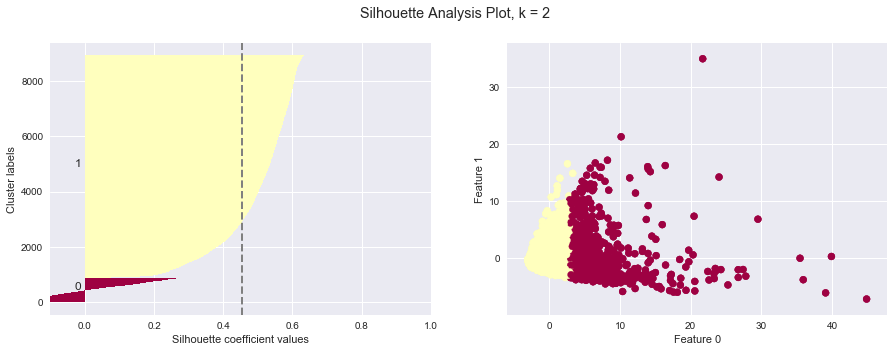

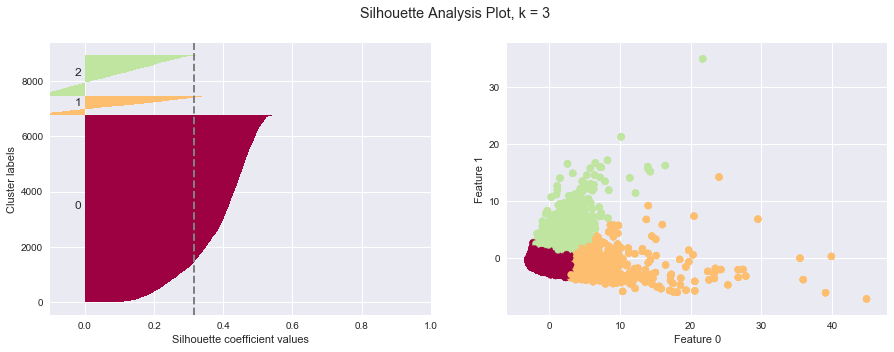

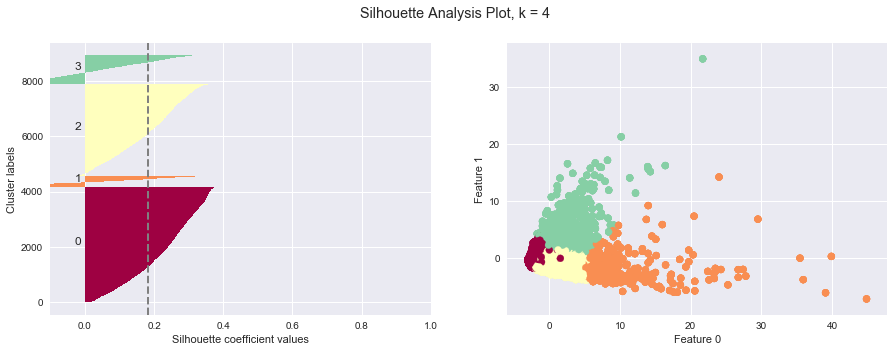

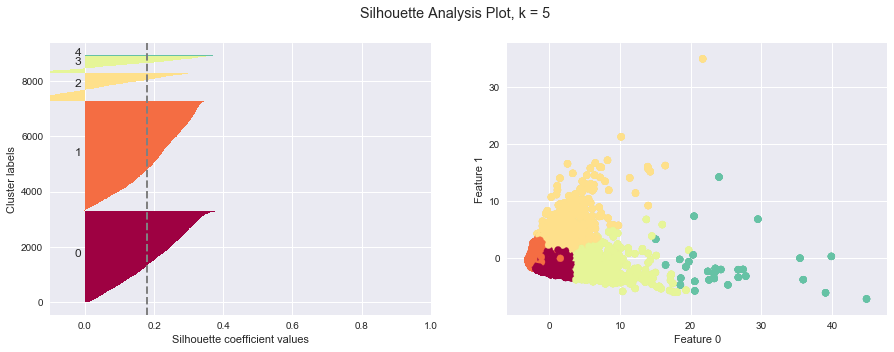

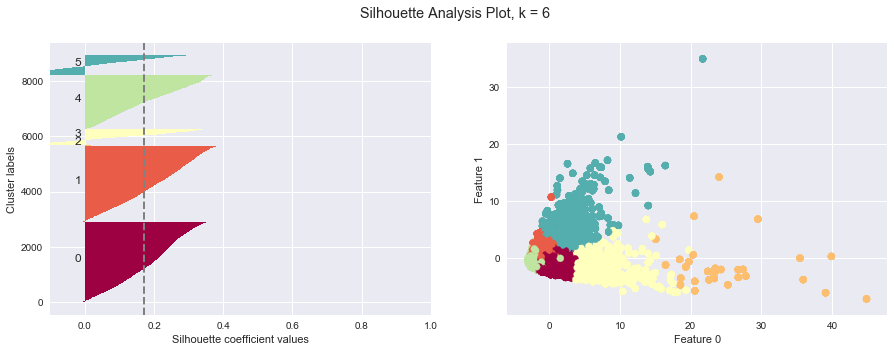

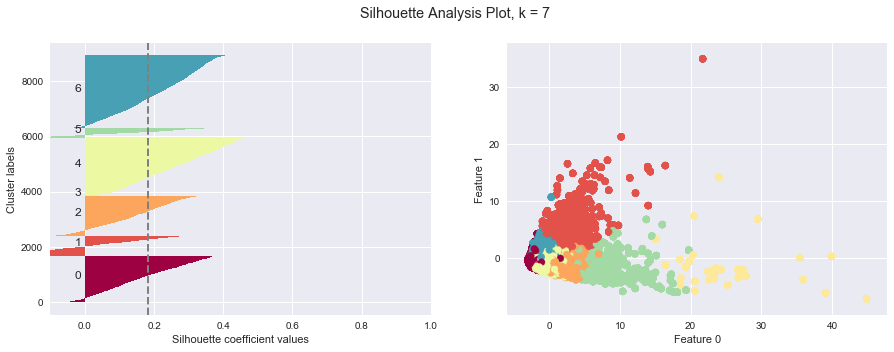

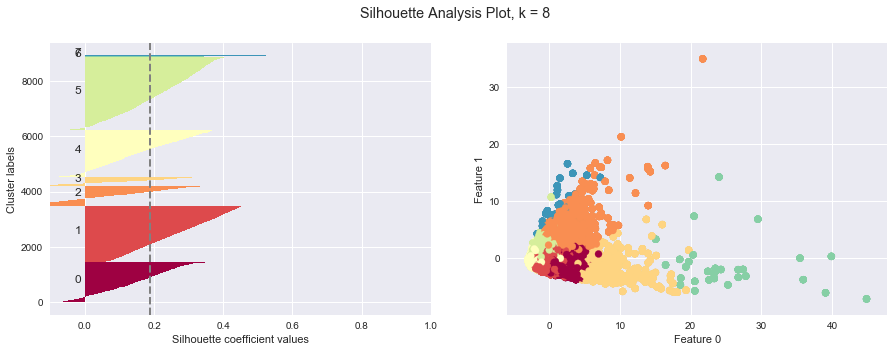

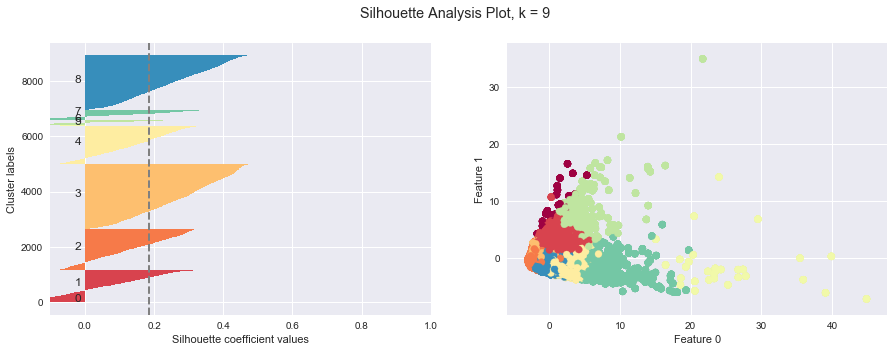

In [54]:
for n_clusters in range(2, 10):
    kmean = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmean.fit(cc_dataclus)
    clusters_kmean = kmean.predict(cc_dataclus)
    silhouette_plot(cc_dataclus, clusters_kmean)

In [53]:
def silhouette_plot(features, cluster_predicts, need_plot = True):   
    n_clusters = len(np.unique(cluster_predicts))
    avg_silhouette_score = silhouette_score(features, cluster_predicts)
    silhouette_coeffs = silhouette_samples(features, cluster_predicts)
    print('n_clusters =', n_clusters, '; avg_silhouette_score =', avg_silhouette_score)    
    
    if need_plot:
        y_lower = 0
        y_upper = 0
        fig, ax = plt.subplots(1, 2, figsize = (15, 5))
        
        for cluster in np.sort(np.unique(cluster_predicts)):
            silhouette_coeffs_cluster = silhouette_coeffs[cluster_predicts == cluster]
            silhouette_coeffs_cluster.sort()

            cmap = cm.get_cmap("Spectral")
            if cluster == -1:
                color = 'black'
            else:
                color = cmap(cluster / n_clusters)

            y_upper += len(silhouette_coeffs_cluster)      
            ax[0].barh(range(y_lower, y_upper), silhouette_coeffs_cluster, height = 1, color = color)
            ax[0].text(-0.03, (y_lower + y_upper)/2, str(cluster))
            y_lower += len(silhouette_coeffs_cluster)

            ax[0].set_xlim([-0.1, 1])
            ax[0].set_xlabel('Silhouette coefficient values')
            ax[0].set_ylabel('Cluster labels')       

            # scatter plot of data colored with labels

            ax[1].scatter(features[0], features[1] , c = cmap(cluster_predicts/ n_clusters))
            ax[1].set_xlabel('Feature 0')
            ax[1].set_ylabel('Feature 1')

        ax[0].axvline(avg_silhouette_score, linestyle = '--', linewidth = 2, color = 'grey')
        plt.suptitle('Silhouette Analysis Plot, k = {}'.format(n_clusters))
        

Here we will choose number of clusters = 7 as i) all of the clusters have higher than the average silhouettescore and and ii) the sizes per cluster are more even

n_clusters = 7 ; avg_silhouette_score = 0.18109575643881537


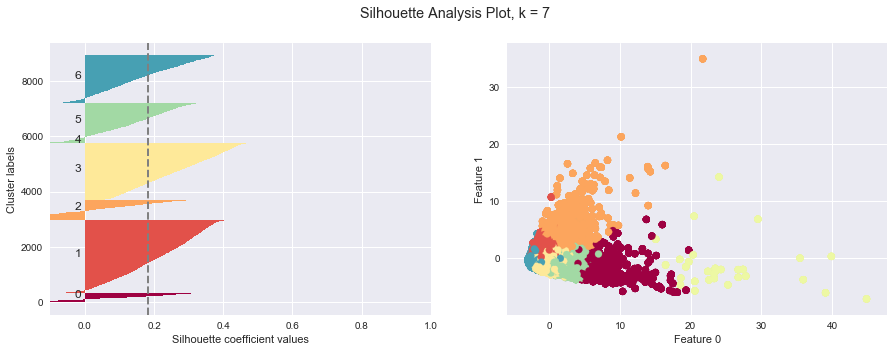

In [55]:
n_clusters = 7
kmean = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
kmean.fit(cc_dataclus)
clusters_kmean = kmean.predict(cc_dataclus)
silhouette_plot(cc_dataclus, clusters_kmean)

In [56]:
pd.DataFrame(pd.Series(clusters_kmean).value_counts(), columns = ['size'])

,size
1,2620
3,2059
6,1713
5,1438
2,712
0,356
4,30


#### 4.2. Method 2: DBSCAN

Based on a set of points, DBSCAN groups together points that are close to each other based on a distance measurement  and a minimum number of points. It also marks as outliers the points that are in low-density regions. DBSCAN requires 2 parameters, i) `eps`, which specifies how close points should be to each other to be considered a part of a cluster; and ii) `min_samples`, i.e. the minimum number of points to form a dense region.

##### i. eps

To determine the optimal eps, we will calculate the minimum distance between 2 neighbouring points, plot the graph of the distance and find the optimal eps using Elbow Method to find the point of maximum curvature

Text(0.5,1,'Distance between 2 neighboring points (Focus on 2 - 5)')

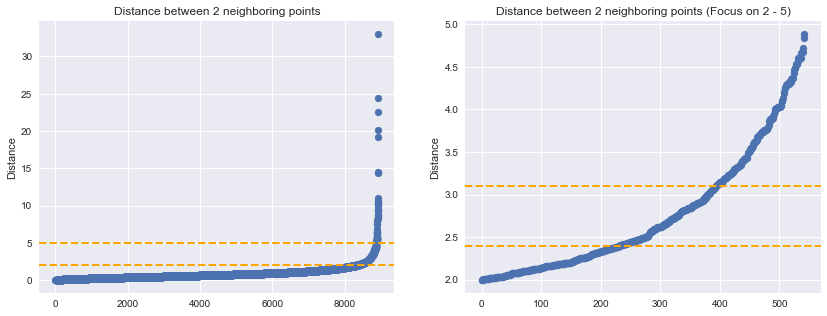

In [57]:
knn = NearestNeighbors(n_neighbors = 2)
knn.fit(cc_dataclus)
pt_distance, indices = knn.kneighbors(cc_dataclus)
distance_df = pd.DataFrame(pt_distance[:, 1], columns = ['distance']).sort_values(by = 'distance')

fig, ax = plt.subplots(1, 2, figsize = (14, 5))
ax[0].axhline(2, linestyle ='--', linewidth = 2, color = 'orange')
ax[0].axhline(5, linestyle ='--', linewidth = 2, color = 'orange')
ax[0].scatter(range(distance_df.shape[0]), distance_df['distance'])
ax[0].set_ylabel('Distance') 
ax[0].set_title('Distance between 2 neighboring points')

distance_df_focus = distance_df[(distance_df.distance <= 5) & (distance_df.distance >= 2)]

ax[1].axhline(2.4, linestyle ='--', linewidth = 2, color = 'orange')
ax[1].axhline(3.1, linestyle ='--', linewidth = 2, color = 'orange')
ax[1].scatter(range(distance_df_focus.shape[0]), distance_df_focus['distance'])
ax[1].set_ylabel('Distance')
ax[1].set_title('Distance between 2 neighboring points (Focus on 2 - 5)')

Based on the Elbow Method, we can say the optimal eps lies within distance = 2.4 to 3.1. We will apply silhouette analysis again to select the optimal eps value based on the best average silhouette score. Here we assume `min_samples` = 5. Based on the figures below, it suggests the eps value to be 2.6 as it gives highest silhouette score.

In [58]:
for eps in np.arange(2.4, 3.1, 0.1):
    dbscan = DBSCAN(eps = eps, min_samples = 5)
    clusters_dbscan = dbscan.fit_predict(cc_dataclus)
    print('For eps = {}:'.format(str(eps)))
    silhouette_plot(cc_dataclus, clusters_dbscan, need_plot = False)

For eps = 2.4:
n_clusters = 3 ; avg_silhouette_score = 0.44359942843480166
For eps = 2.5:
n_clusters = 3 ; avg_silhouette_score = 0.44947146739839733
For eps = 2.6:
n_clusters = 2 ; avg_silhouette_score = 0.5867118950761747
For eps = 2.7:
n_clusters = 3 ; avg_silhouette_score = 0.3992488201609841
For eps = 2.8000000000000003:
n_clusters = 3 ; avg_silhouette_score = 0.5474470008359522
For eps = 2.9000000000000004:
n_clusters = 4 ; avg_silhouette_score = 0.46807356921806176
For eps = 3.0000000000000004:
n_clusters = 3 ; avg_silhouette_score = 0.48399853943355114
For eps = 3.1000000000000005:
n_clusters = 3 ; avg_silhouette_score = 0.4839242090588033


##### ii. min_samples

To find the optimal min_samples, we will apply a range of min_samples (from 2 to 10) and select the one that yields similar number of clusters as we have chosen using K-means algorithm. Therefore, we will choose min_samples = 4 as it yields 6 clusters (including the outlier cluster) which is similar to n_clusters = 7 we got above using K-means

In [62]:
eps = 2.6
for min_samples in np.arange(2, 10, 1):
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    clusters_dbscan = dbscan.fit_predict(cc_dataclus)
    print('For min_samples = {}:'.format(min_samples))
    silhouette_plot(cc_dataclus, clusters_dbscan, need_plot = False)

For min_samples = 2:
n_clusters = 34 ; avg_silhouette_score = 0.14340664153827565
For min_samples = 3:
n_clusters = 11 ; avg_silhouette_score = 0.18883638012714649
For min_samples = 4:
n_clusters = 6 ; avg_silhouette_score = 0.39247341990500073
For min_samples = 5:
n_clusters = 2 ; avg_silhouette_score = 0.5867118950761747
For min_samples = 6:
n_clusters = 2 ; avg_silhouette_score = 0.5821325803273656
For min_samples = 7:
n_clusters = 2 ; avg_silhouette_score = 0.5780819324917689
For min_samples = 8:
n_clusters = 2 ; avg_silhouette_score = 0.5752513188359258
For min_samples = 9:
n_clusters = 2 ; avg_silhouette_score = 0.5736874257313413


n_clusters = 6 ; avg_silhouette_score = 0.39247341990500073


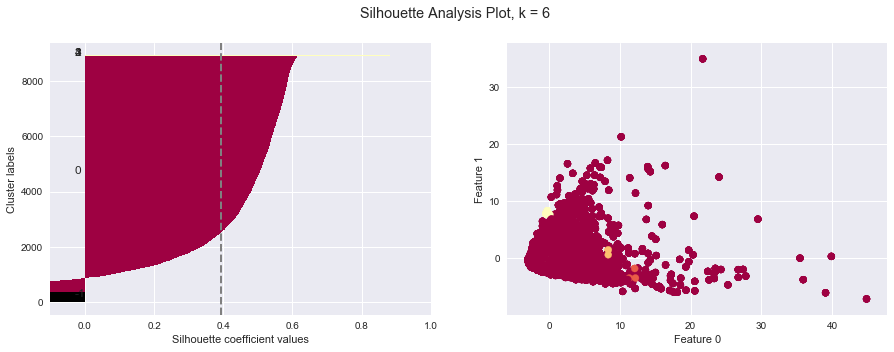

In [64]:
eps = 2.6
min_samples = 4
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
clusters_dbscan = dbscan.fit_predict(cc_dataclus)
silhouette_plot(cc_dataclus, clusters_dbscan)

In [65]:
pd.DataFrame(pd.Series(clusters_dbscan).value_counts(), columns = ['size'])

,size
0,8521
-1,392
4,4
3,4
1,4
2,3


Comparing 2 algorithms, we will choose the clusters based on **K-means** as 
1. DBSCAN is density-based, which is greatly affected by the distribution of the points. As the credit card data is heavily skewed in most of our features, it yields a cluster consisting of most of the sample. That is not our intention as to separate our users into groups to deliver more targeted marketing;
2. DBSCAN can better identify outliers, whom behave differently and cannot be clustered into any group, thus no marketing strategy can be generated. In reality, these users will be considered into the nearest group by business users to form the strategy. Therefore, Kmeans is better in this case.

### 5. Cluster Characteristics and Marketing Strategy

#### 5.1. Cluster Characteristics

Let us identify the cluster characteristics by looking at the distribution on values of each feature per cluster

In [66]:
cc_datastra = cc_dataexpl.copy()
cc_datastra['Cluster'] = clusters_kmean
cc_datastra.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,AVG_TOTAL_SPENT,AVG_PURCHASES,AVG_CASH_ADVANCE,MTH_AVG_TOTAL_SPENT,MTH_AVG_PURCHASES,MTH_AVG_CASH_ADVANCE,ONEOFF_PUR_TO_PURCHASES_RATIO,BALANCE_TO_CREDIT_RATIO,MIN_PAY_TO_PAYMENTS_RATIO,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,47.700000,47.700000,0.000000,7.950000,7.950000,0.000000,0.0,0.040901,0.691320,6
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,1610.736371,0.000000,1610.736371,536.912124,0.000000,536.912124,0.0,0.457495,0.261353,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,64.430833,64.430833,0.000000,64.430833,64.430833,0.000000,1.0,0.332687,1.008388,5
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,852.394009,1499.000000,205.788017,142.065668,124.916667,17.149001,1.0,0.222223,0.000000,6
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,16.000000,16.000000,0.000000,1.333333,1.333333,0.000000,1.0,0.681429,0.360871,1


In [67]:
print('Cluster Size:')
cc_datastra['Cluster'].value_counts().sort_index()

Cluster Size:


0     356
1    2620
2     712
3    2059
4      30
5    1438
6    1713
Name: Cluster, dtype: int64

,AVG_TOTAL_SPENT_TRX,AVG_TOTAL_SPENT,MTH_AVG_TOTAL_SPENT,ONEOFF_PUR_TO_PURCHASES_RATIO,BALANCE_TO_CREDIT_RATIO,MIN_PAY_TO_PAYMENTS_RATIO
Cluster,,,,,,
0,7.416667,65.618210,496.899583,0.571873,0.365605,0.187304
1,0.416667,156.709426,89.059644,0.000000,0.744120,0.956871
2,1.833333,301.234784,523.914877,0.000000,0.607431,0.574868
3,1.083333,41.060000,51.505833,0.000000,0.065360,0.401183
4,10.708333,224.996482,2167.394167,0.814688,0.268464,0.049311
5,2.333333,73.062153,183.752083,0.796728,0.226851,0.194544
6,0.333333,89.600000,31.111667,0.724134,0.018621,0.203374


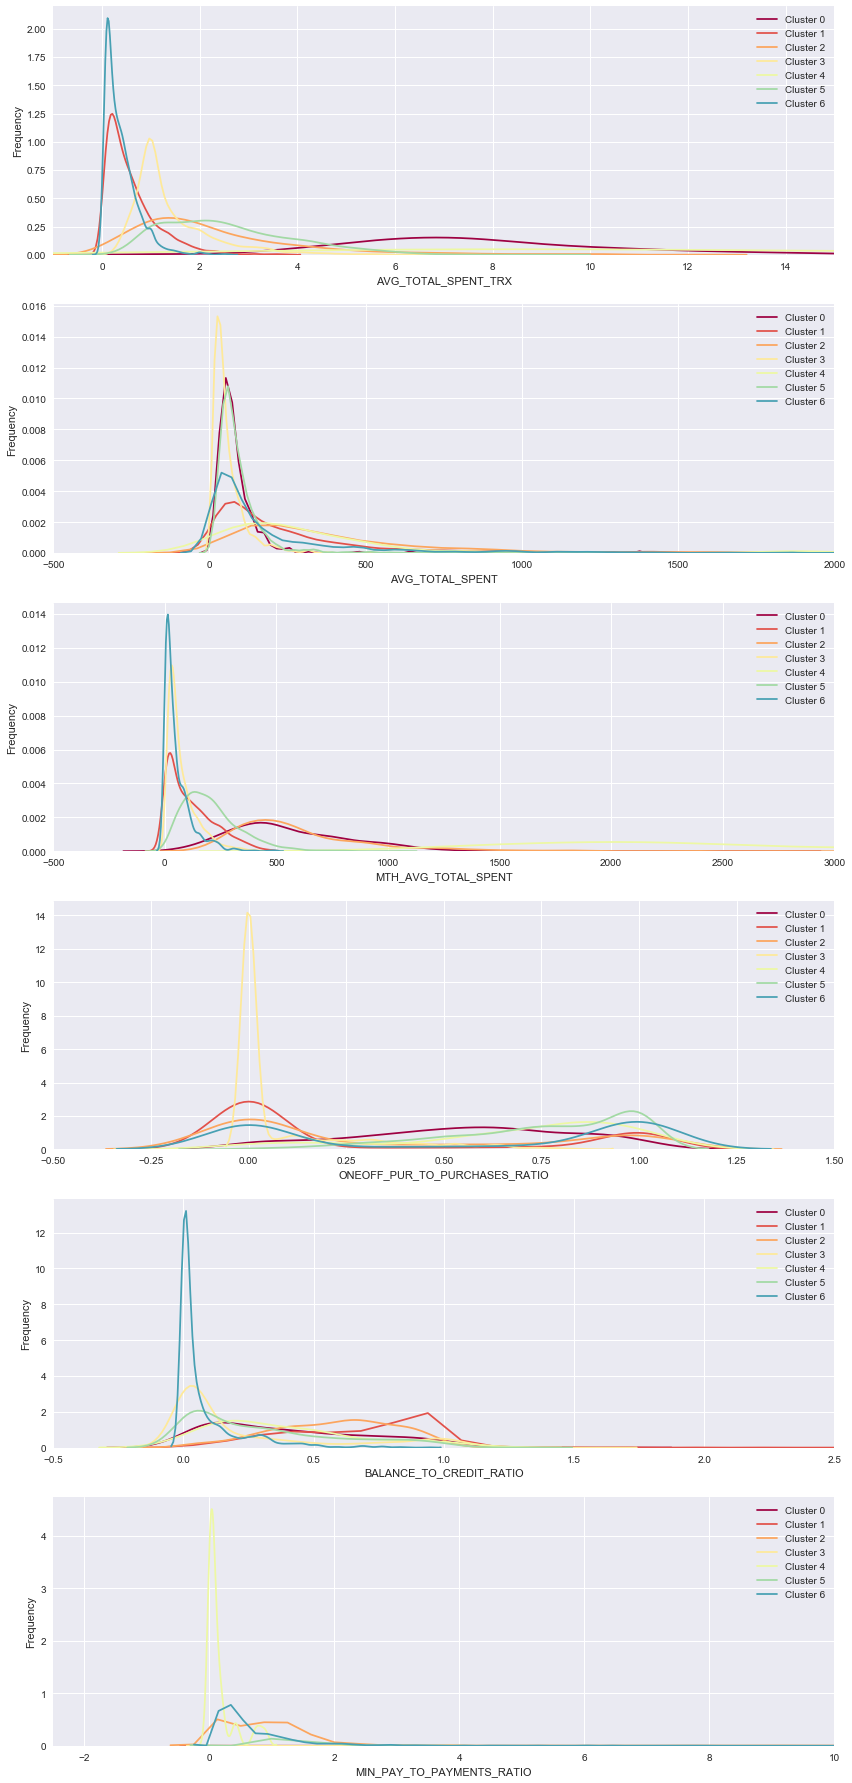

In [68]:
xlabels = ['AVG_TOTAL_SPENT_TRX', 'AVG_TOTAL_SPENT', 'MTH_AVG_TOTAL_SPENT', 'ONEOFF_PUR_TO_PURCHASES_RATIO', 'BALANCE_TO_CREDIT_RATIO', 'MIN_PAY_TO_PAYMENTS_RATIO']
xlims = [[-1, 15], [-500, 2000], [-500, 3000], [-0.5, 1.5], [-0.5, 2.5], [-2.5, 10]]

gif, ax = plt.subplots(len(xlabels), 1, figsize = (14, 32))
n_clusters = len(np.unique(cc_datastra.Cluster))
cmap = cm.get_cmap("Spectral")

for i, xlabel in enumerate(xlabels):
    for cluster in np.unique(cc_datastra.Cluster):
        ax[i].set_xlim(xlims[i])
        sns.distplot(cc_datastra[cc_datastra.Cluster == cluster][xlabel], hist = False, kde = True, bins = 20, label = 'Cluster {}'.format(cluster), color = cmap(cluster / n_clusters), ax = ax[i])
        ax[i].set_ylabel('Frequency')
        
cc_datastra[['Cluster'] + xlabels].groupby('Cluster').agg('median')

##### i. Monthly average number of spending 

When we look at the `AVG_TOTAL_SPENT_TRX`, we can in general classify the users into 3 groups in terms of frequency:
1. Frequent Spender: Cluster 0 & 4, who in average do transactions > 2 per month
2. Spender w/ mild frequency: Cluster 2 & 3 & 5, who in average do 1 - 2 transactions per month
3. Non-frequent Spender: Cluster 1 & 6, who in average do < 1 transaction per month

##### ii. Average volume per spending

When we look at the `AVG_TOTAL_SPENT`, we can in general classify the users into 3 groups in terms of monetary value:
1. Big Spender: Cluster 1 & 2 & 4, who in average spend > \$100 per transaction
2. Mild Spender: Cluster 0 & 5 & 6, who in average spend > \$50 but < \$100 per transaction
3. Small Spender: Cluster 3, who in average spend < \$50 per transaction

##### iii. Monthly average spending volume

Indeed `MTH_AVG_TOTAL_SPENT` is the combined effect of the first 2 features, which we can notice
1. Cluster 0, 2, 4 are really big spenders
2. Cluster 1, 5 are mild spenders with potentials
3. Cluster 3, 6 are less frequent, small spending groups of customers

##### iv. One-off Purchases to Total Purchase ratio

When we look at the `ONEOFF_PUR_TO_PURCHASES_RATIO`, the result is more polarized that
1. One-off: Cluster 1 & 2 & 3, who prefer more one-off purchases
2. 50-50: Cluster 6 has 2 crests on ~0 & ~1 ratio, while Cluster 0 users in average skew a bit towards installment purchase
3. Installment: Cluster 4 & 5, who prefer more installment purchases

##### v. Balance to Credit Limit ratio

When we look at the `BALANCE_TO_CREDIT_RATIO`, we can simply set a threshold at 0.5 and divide the clusters into 2 groups
1. Healthy Spender: Cluster 0 & 3 - 6, most of them keep their ratio close to 0
2. Less healthy Spender: Cluster 1 & 2, most of them keep their ratio closer to 1

##### vi. Minimum Payments to Payments ratio

This is more divergent when we look at the distribution, in general we can set the threshold at 1 and divide into 2 groups
1. Prudent Payer: Cluster 4 & 6, who usually pay more than the min. pay required
2. Less Prudent Payer: Cluster 0 & 5, who usually pay less than the min. pay required

Note: Since possible records with errors are spotted during the data enrichment on this metric, we will take it into less consideration when we formulate our marketing strategy

#### To conclude, we can describe our user clusters as follows:
`Cluster 0`: 
- Medium group. Similar to Cluster 3, they spend frequent and quite big. 
- Some of them prefer oneoff purchases but some don't. They are willing to pay their bill.

`Cluster 1`: 
- Big group. Non-frequent spenders but in big volume. The net effect shows they are with potential. 
- They prefer more one-off payment but also pushing balance to their credit limit.

`Cluster 2`: 
- Medium group. They spend quite frequent and big, thus they are our big spenders. 
- They prefer oneoff purchases but less willing to pay their bill.

`Cluster 3`: 
- Big group. They spend less frequent and small, so they spend little. 
- They prefer oneoff purchases and more willing to pay their bill.

`Cluster 4`: 
- Very small group. They are both frequent and big spenders. 
- They prefer installment purchases and more willing to pay their bill.

`Cluster 5`: 
- Big group. They are quite frequent and quite big spenders. 
- They prefer much installment purchases and they are willing to pay their bill.

`Cluster 6`: 
- Big group. Similar to Cluster 2 that they spend less frequent and small. 
- Some of them prefer oneoff purchases but some don't. They are willing to pay their bill.

#### 5.2. Marketing Strategy

Assume the business objective is to **increase the spending** of our credit card users, different marketing strategies will be applied to good, with potentials, non-performing customers respectively

##### 1. Good Customers
Cluster 0, 2, 4 are good customers, which consist of ~ 1100 customers and contribute a lot of spending. Our strategy is to **retain** them and to ensure they **maintain the current level** of spending or higher. 

Measures:
1. Raise the cashback level given they reach a high level of monthly spending to incentify their spending
2. Provide additional, brand-promoting benefits, e.g. airport lounge key, membership of high-end clubhouse, given the high level of spending.
3. As Cluster 2 users' balance-to-credit-limit is a bit high, we can also provide financing service at a lower interest rate given the high level of spending, which can retain high spending while solve the high ratio issue.

##### 2. Customers with Potentials
Cluster 1, 5 are customers with potential, which consists of ~ 4000 customers. Our strategy is to **incentify** them for **higher spending** in terms of frequency and volume. Since they behave differently, we will apply different measures.

Measures: 
1. Cluster 1 users are not frequent buyers but they spend quite a lot per transaction. One possible reason can be the categories of spending are on slow-moving, high-end goods, e.g. electronics, or luxury, etc. Higher cashback programs on fast-moving, middle-end goods, e.g. cosmetics, dining, etc., can be provided to them to incentify for more frequent spending. 
2. Similar financing service with lower interest rate can also be provided for Cluster 1 users to solve the high balance-to-credit-limit ratio.
3. On contrary, Cluster 5 users are more frequent but spend less per transaction, which can be on dining, entertainment, costmetics, etc. Higher cashback programs on high-end goods, e.g. electronics, or luxury, etc., can be offered to them.
4. Installment plans having higher loan amount and lower interest rate or handling fee can be offered as they are more likely to do installment purchases.

##### 3. Non-performing Customers
Cluster 3, 6 users are non-performing customers, which consists of ~ 3700 customers. Our strategy is to **retain** them with **low cost** marketing programs, as we should focus more on good customers and customers with potential for now. 

Measures:
1. Push notifications to them of our latest promotion and study the retention rate of these users. 
2. Run surveys with them to find out their needs and not to lose them to our competitors.

### 6. The Next Steps

So far we focused on the retention and reengagement of our current credit card users, which our next steps can study the effectiveness of the campaigns and do more in terms of user acqusition and engagement

#### 6.1 Campaign effectiveness study

After the implementation of the camapigns, we have to evaluate if the campaigns are effective by looking at any positive and expected changes in various KPIs per cluster. If it is not favourable, we should iteratively improve our marketing campaigns or even our clustering techniques.

#### 6.2. Acquisition

Out of the Good Customers, we can study the correlation between their card spending behaviours and other attributes, e.g. geographical, demographical, or user behaviours in other products within our company. This helps 
- create lookalike reference what users of our other products or non-users we should acquire 
- determine the direction of our credit card expansion, e.g. which region we should enter? how should we our card position (e.g. oversea spending? local spending?) ?

#### 6.3. Engagement

Our data consists of users with at least 6 months usage of our credit users. Our objective this time will be to make classification, based on data collected during the first few visits of the credit card users. This helps provision of targeted marketing as soon as possible.